In [82]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Ustawienia stylu dla wykresów
sns.set(style='whitegrid')

In [3]:
# Wczytywanie zbiorów danych
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')

<h1>1. Analiza danych:<h1>


In [4]:
# Liczba wierszy i kolumn w zbiorze treningowym
print("Zbiór treningowy:")
print("Liczba wierszy:", train.shape[0])
print("Liczba kolumn:", train.shape[1])

Zbiór treningowy:
Liczba wierszy: 20000
Liczba kolumn: 11


In [5]:
# Liczba wierszy i kolumn w zbiorze testowym
print("\nZbiór testowy:")
print("Liczba wierszy:", test.shape[0])
print("Liczba kolumn:", test.shape[1])


Zbiór testowy:
Liczba wierszy: 5000
Liczba kolumn: 11


In [6]:
# Typy danych w zbiorze treningowym
print("\nTypy danych w zbiorze treningowym:")
print(train.dtypes)


Typy danych w zbiorze treningowym:
Age                  int64
Income             float64
CreditScore        float64
LoanAmount         float64
EmploymentYears      int64
NumDependents        int64
DebtToIncome       float64
EducationLevel       int64
FavoriteColor       object
Hobby               object
Default              int64
dtype: object


In [7]:
# Typy danych w zbiorze testowym
print("\nTypy danych w zbiorze testowym:")
print(test.dtypes)


Typy danych w zbiorze testowym:
Age                  int64
Income             float64
CreditScore        float64
LoanAmount         float64
EmploymentYears      int64
NumDependents        int64
DebtToIncome       float64
EducationLevel       int64
FavoriteColor       object
Hobby               object
Default              int64
dtype: object


In [8]:
# Statystyki opisowe dla zbioru treningowego
print("\nStatystyki opisowe dla zbioru treningowego:")
print(train.describe())


Statystyki opisowe dla zbioru treningowego:
                Age         Income   CreditScore    LoanAmount  \
count  20000.000000   20000.000000  17617.000000  20000.000000   
mean      44.959150   50004.431236    574.118635  20030.527761   
std       14.083764   15019.289666    159.041321   4992.059462   
min       21.000000  -16984.057953    300.000000  -2314.842635   
25%       33.000000   39716.883271    437.000000  16646.478319   
50%       45.000000   50084.103696    575.000000  20046.233086   
75%       57.000000   60285.318369    711.000000  23393.056940   
max       69.000000  117186.263765    849.000000  38800.776243   

       EmploymentYears  NumDependents  DebtToIncome  EducationLevel  \
count     20000.000000    20000.00000  20000.000000    20000.000000   
mean         19.369250        1.98985      0.502592        2.506150   
std          11.548159        1.41193      0.289153        1.116882   
min           0.000000        0.00000      0.000018        1.000000   
25%  

In [9]:
# Statystyki opisowe dla zbioru testowego
print("\nStatystyki opisowe dla zbioru testowego:")
print(test.describe())


Statystyki opisowe dla zbioru testowego:
               Age         Income  CreditScore    LoanAmount  EmploymentYears  \
count  5000.000000    5000.000000  4392.000000   5000.000000      5000.000000   
mean     44.932800   49712.546684   569.282559  19985.813991        19.603200   
std      14.281396   15002.843463   159.305492   5069.524268        11.465463   
min      21.000000   -1540.935845   300.000000   4084.783672         0.000000   
25%      33.000000   39364.243116   432.000000  16540.195620        10.000000   
50%      45.000000   49769.864008   562.000000  20008.658037        19.500000   
75%      57.000000   59943.586025   708.000000  23425.483395        30.000000   
max      69.000000  105917.500171   849.000000  38027.953418        39.000000   

       NumDependents  DebtToIncome  EducationLevel      Default  
count    5000.000000   5000.000000     5000.000000  5000.000000  
mean        1.999200      0.511993        2.519400     0.352000  
std         1.410956      0.28

In [10]:
# Lista zmiennych numerycznych
numeric_features = ['Age', 'Income', 'CreditScore', 'LoanAmount',
                    'EmploymentYears', 'NumDependents', 'DebtToIncome']

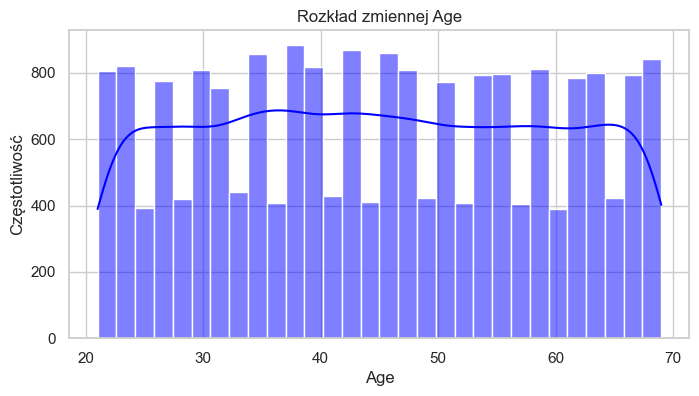

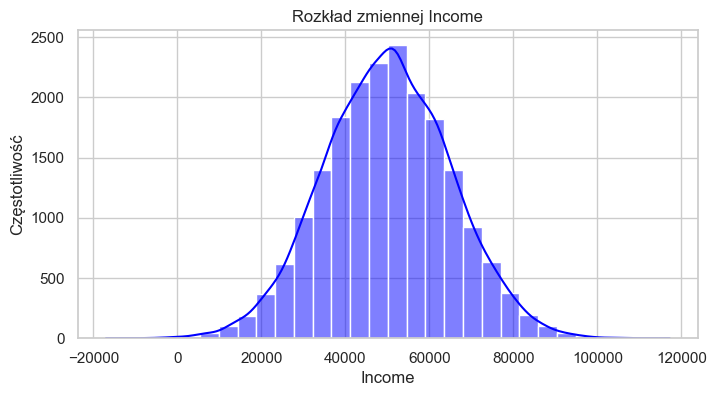

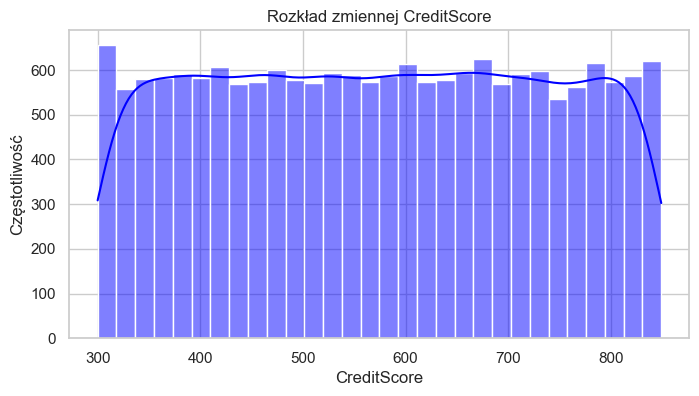

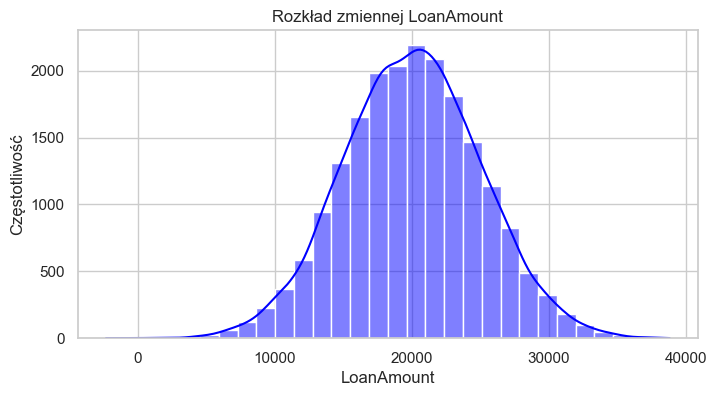

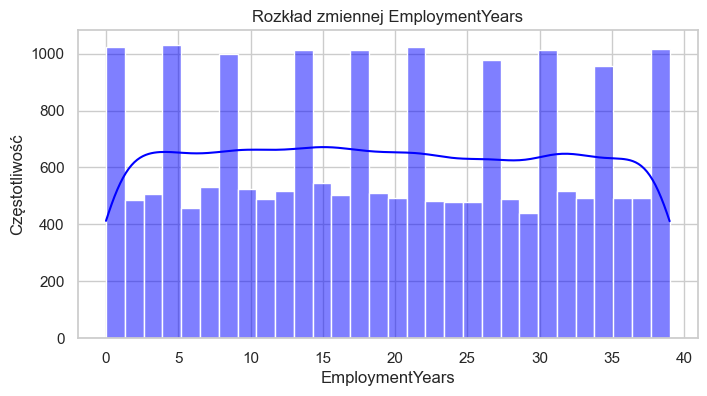

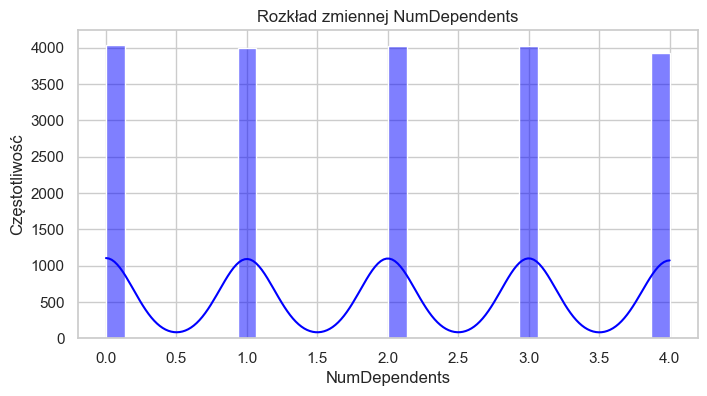

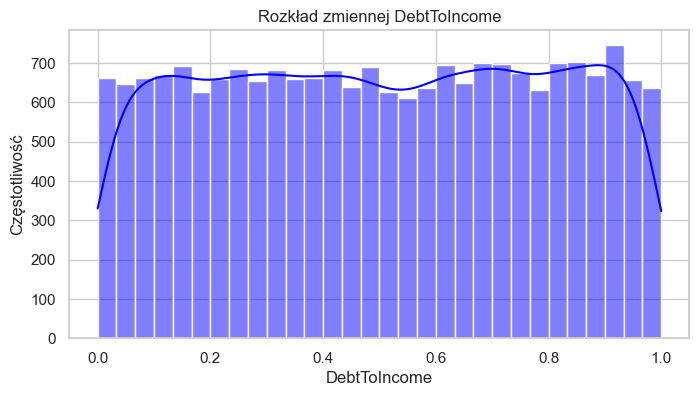

In [11]:
# Histogramy dla zmiennych numerycznych
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature], kde=True, bins=30, color='blue')
    plt.title(f'Rozkład zmiennej {feature}')
    plt.xlabel(feature)
    plt.ylabel('Częstotliwość')
    plt.show()

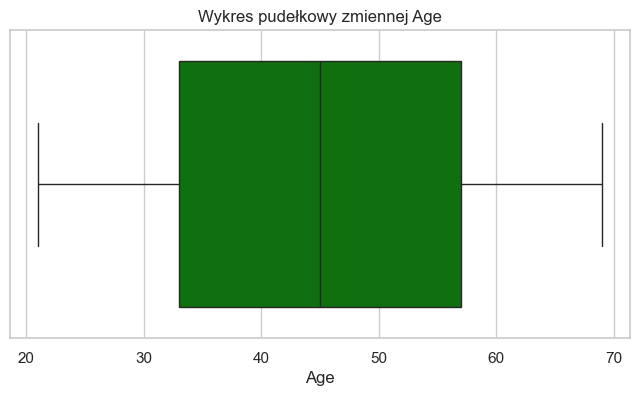

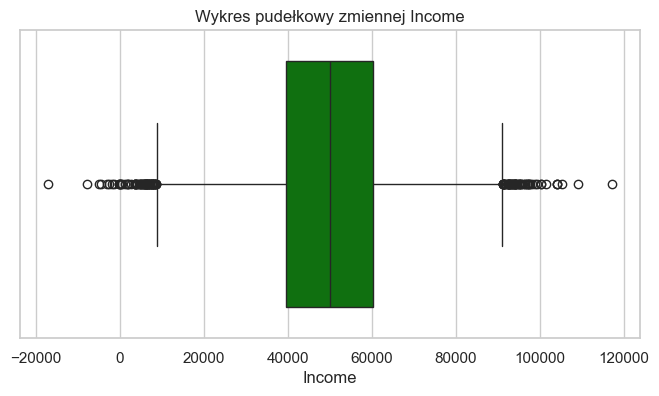

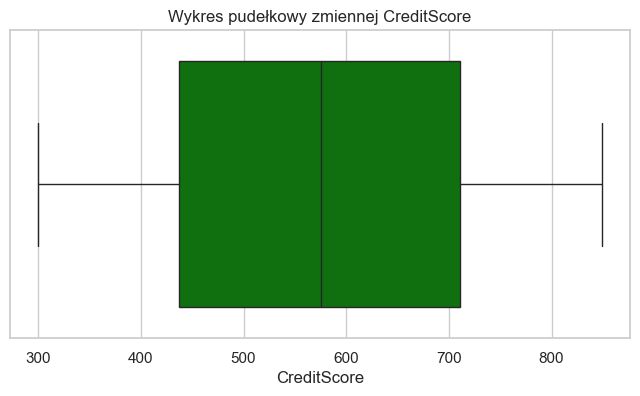

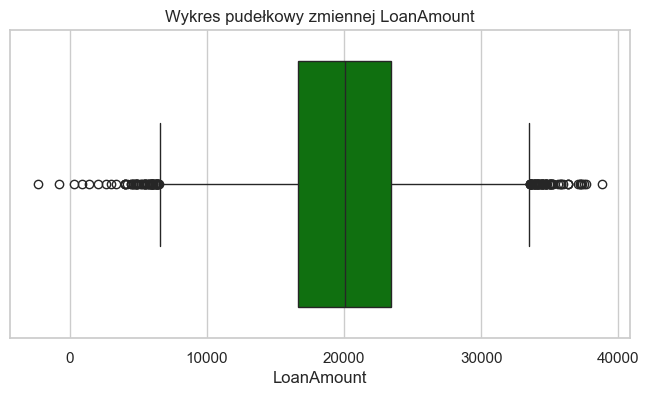

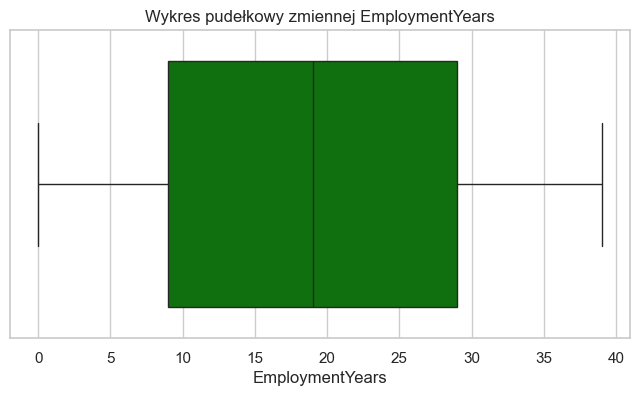

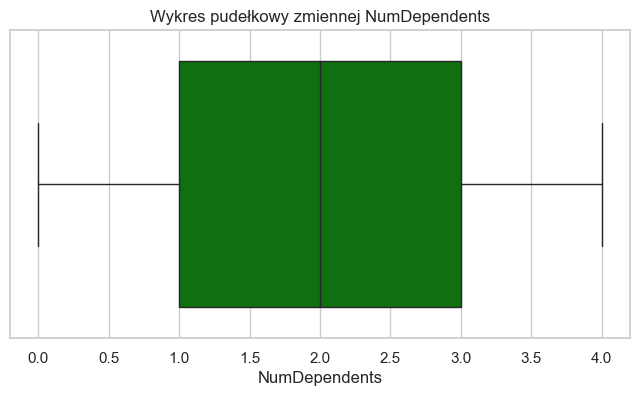

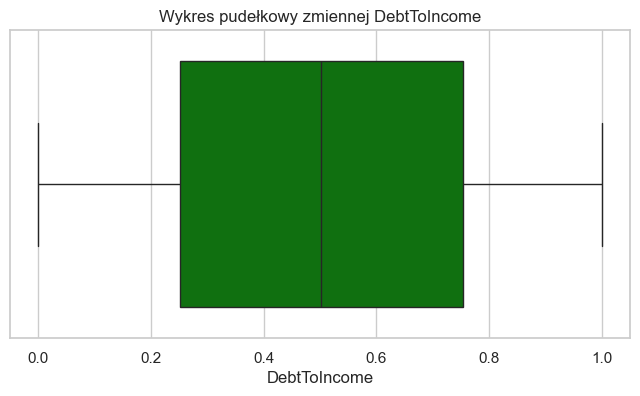

In [12]:
# Wykresy pudełkowe dla zmiennych numerycznych
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[feature], color='green')
    plt.title(f'Wykres pudełkowy zmiennej {feature}')
    plt.xlabel(feature)
    plt.show()

In [13]:
# Lista zmiennych kategorycznych
categorical_features = ['EducationLevel', 'FavoriteColor', 'Hobby']

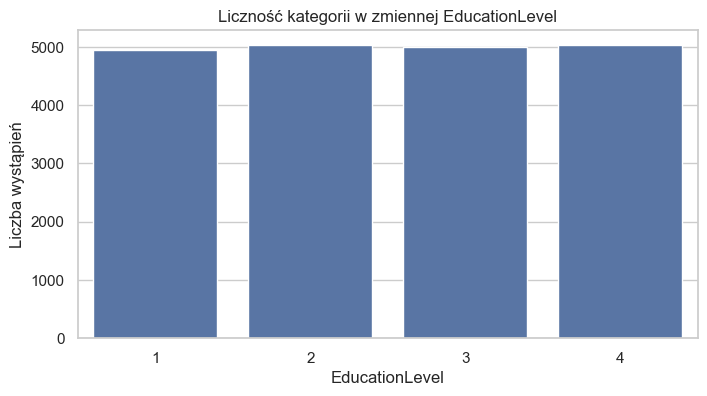

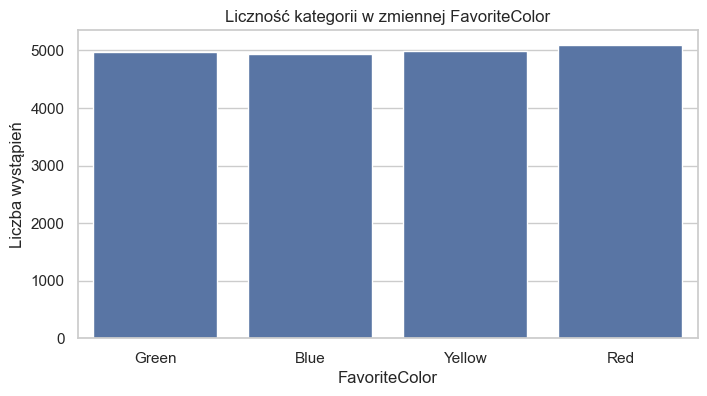

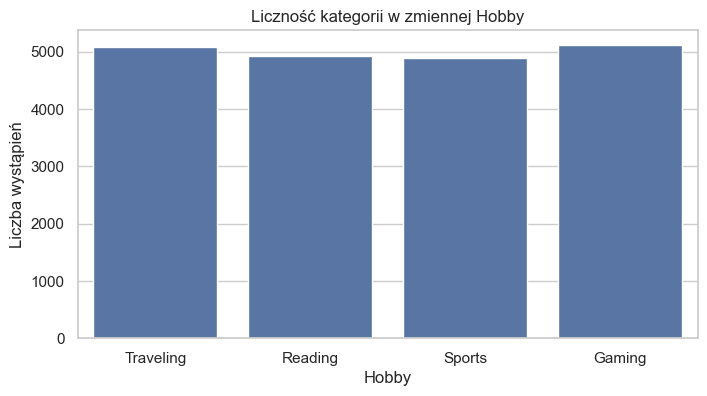

In [14]:
# Wykresy słupkowe dla zmiennych kategorycznych
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=train, legend=False)
    plt.title(f'Liczność kategorii w zmiennej {feature}')
    plt.xlabel(feature)
    plt.ylabel('Liczba wystąpień')
    plt.show()

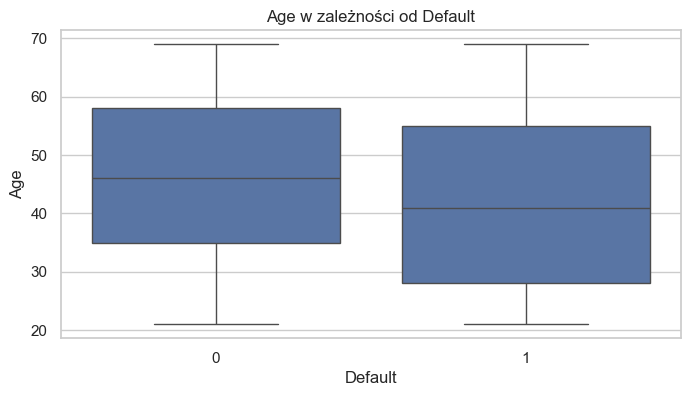

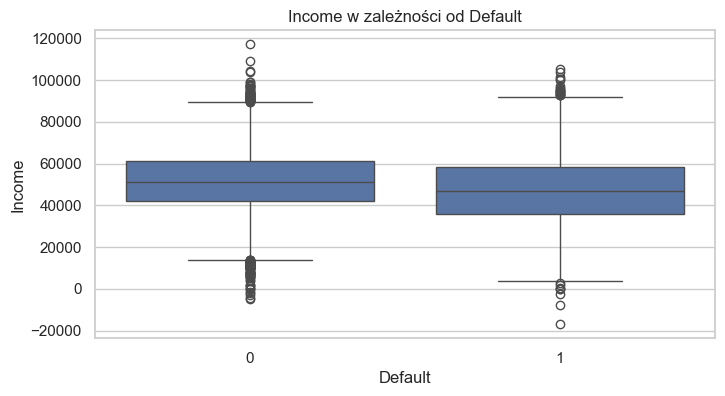

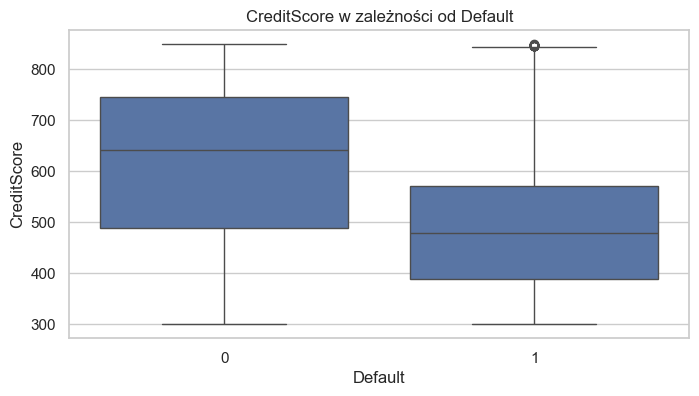

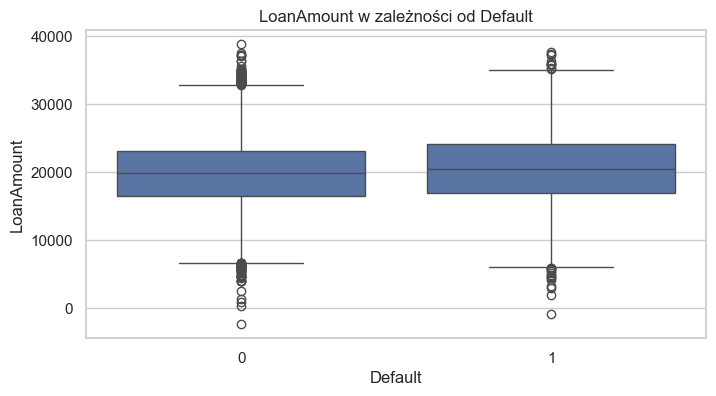

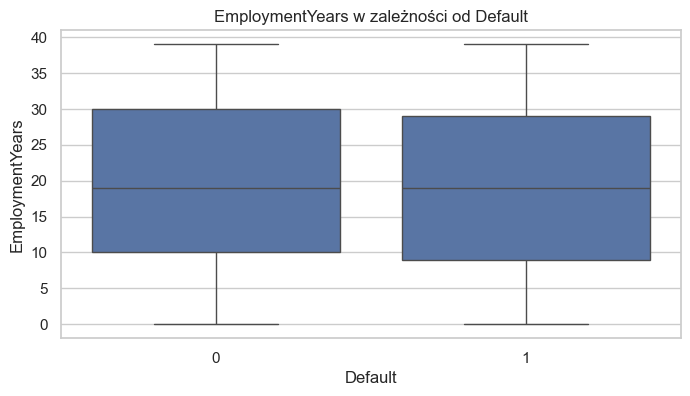

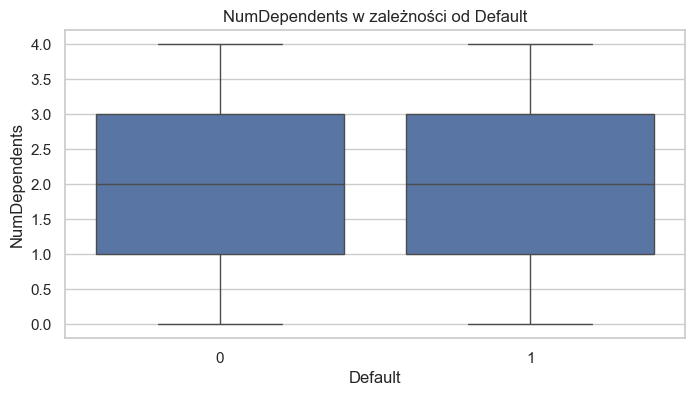

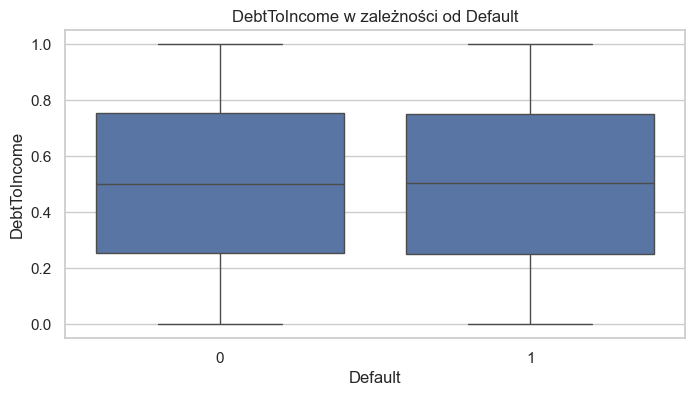

In [15]:
# Wykresy pudełkowe dla zmiennych numerycznych względem Default
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Default', y=feature, data=train, legend=False)
    plt.title(f'{feature} w zależności od Default')
    plt.xlabel('Default')
    plt.ylabel(feature)
    plt.show()

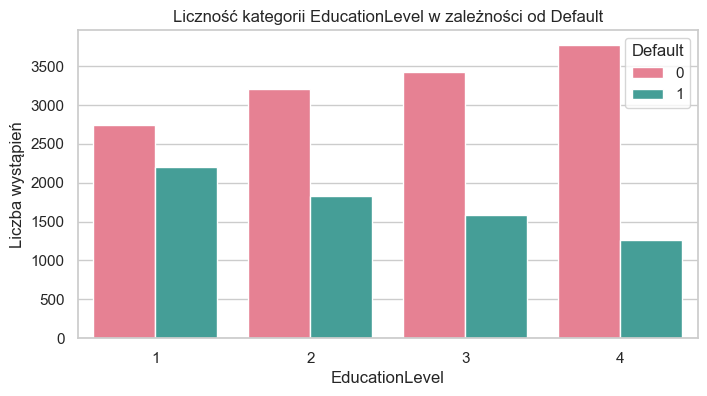

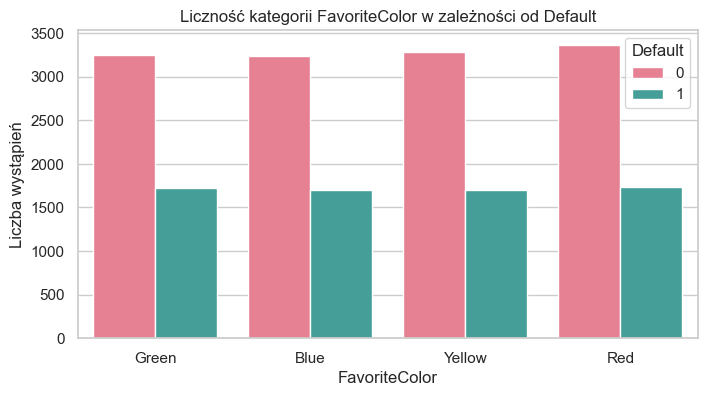

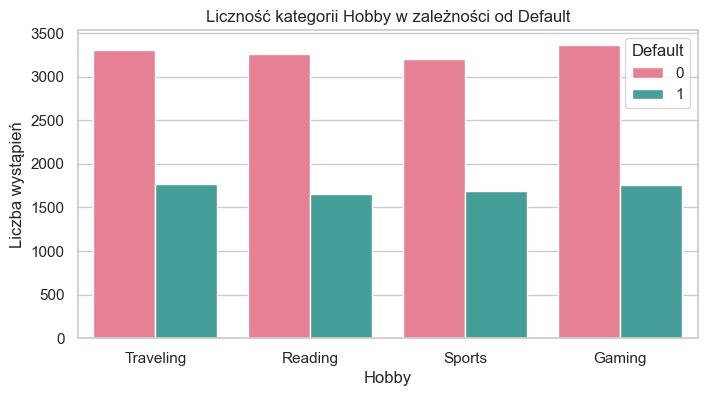

In [16]:
# Wykresy słupkowe dla zmiennych kategorycznych względem Default
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Default', data=train, palette='husl')
    plt.title(f'Liczność kategorii {feature} w zależności od Default')
    plt.xlabel(feature)
    plt.ylabel('Liczba wystąpień')
    plt.legend(title='Default', loc='upper right')
    plt.show()

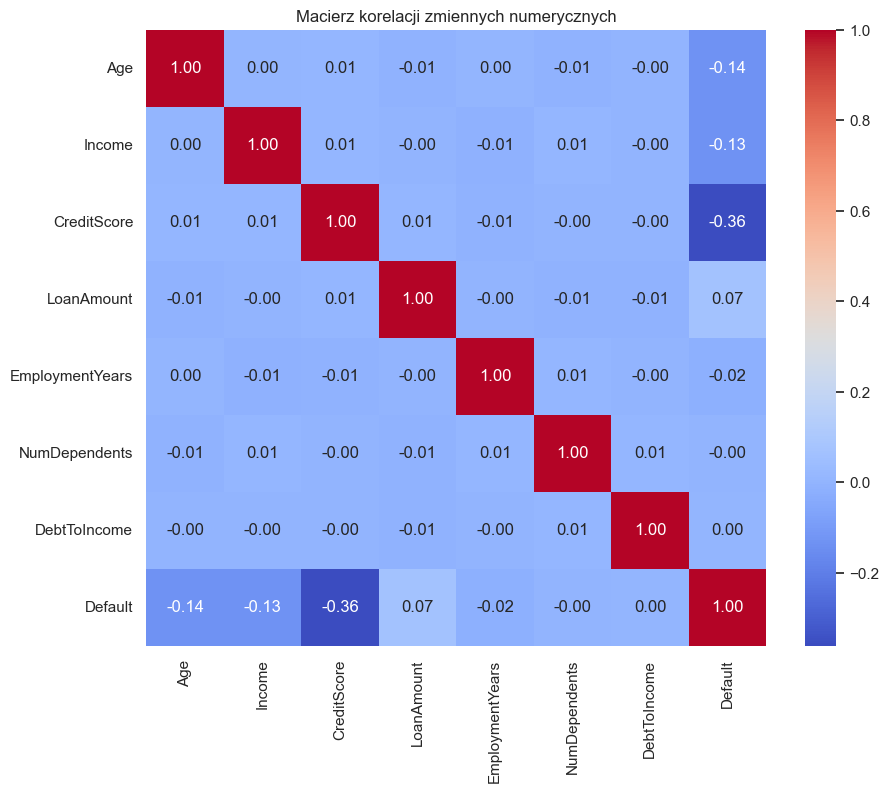

In [17]:
# Macierz korelacji
plt.figure(figsize=(10, 8))
corr_matrix = train[numeric_features + ['Default']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji zmiennych numerycznych')
plt.show()

<h1>2. Przetwarzanie danych:<h1>

In [18]:
# Sprawdzenie brakujących wartości w zbiorze treningowym
print("Brakujące wartości w zbiorze treningowym:")
print(train.isnull().sum())

Brakujące wartości w zbiorze treningowym:
Age                   0
Income                0
CreditScore        2383
LoanAmount            0
EmploymentYears       0
NumDependents         0
DebtToIncome          0
EducationLevel        0
FavoriteColor         0
Hobby                 0
Default               0
dtype: int64


In [19]:
# Sprawdzenie brakujących wartości w zbiorze testowym
print("\nBrakujące wartości w zbiorze testowym:")
print(test.isnull().sum())


Brakujące wartości w zbiorze testowym:
Age                  0
Income               0
CreditScore        608
LoanAmount           0
EmploymentYears      0
NumDependents        0
DebtToIncome         0
EducationLevel       0
FavoriteColor        0
Hobby                0
Default              0
dtype: int64


In [20]:
# Imputacja brakujących wartości w zmiennych numerycznych
for feature in numeric_features:
    median_value = train[feature].median()
    train[feature].fillna(median_value)
    test[feature].fillna(median_value)

In [21]:
# Imputacja brakujących wartości w zmiennych kategorycznych
for feature in categorical_features:
    mode_value = train[feature].mode()[0]
    train[feature].fillna(mode_value)
    test[feature].fillna(mode_value)

In [22]:
# Funkcja do identyfikacji wartości odstających
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [23]:
# Usunięcie wartości odstających dla każdej zmiennej numerycznej w zbiorze treningowym
for feature in numeric_features:
    train = remove_outliers(train, feature)

In [24]:
# Usunięcie nieistotnych zmiennych
train.drop(['FavoriteColor', 'Hobby'], axis=1, inplace=True)
test.drop(['FavoriteColor', 'Hobby'], axis=1, inplace=True)

In [25]:
# Inicjalizacja skalera
scaler = StandardScaler()

In [26]:
# Lista cech do skalowania (bez zmiennej docelowej)
features_to_scale = numeric_features

In [27]:
# Dopasowanie skalera do danych treningowych
scaler.fit(train[features_to_scale])

StandardScaler()

In [28]:
# Transformacja danych treningowych i testowych
train_scaled = train.copy()
test_scaled = test.copy()

In [29]:
train_scaled[features_to_scale] = scaler.transform(train[features_to_scale])
test_scaled[features_to_scale] = scaler.transform(test[features_to_scale])

In [30]:
print("Zbiór treningowy po przetwarzaniu:")
print(train_scaled.head())

Zbiór treningowy po przetwarzaniu:
        Age    Income  CreditScore  LoanAmount  EmploymentYears  \
0  0.996049 -2.276213     0.187437   -0.119261        -1.419087   
1  0.286234  0.834341     0.244048   -0.636023         1.179059   
3  1.279975  0.861032    -1.328481   -0.571421        -1.419087   
4 -1.204377  0.310329     0.206308    0.608246         0.226406   
5 -0.281618 -2.192957    -1.479444   -0.432067        -0.466433   

   NumDependents  DebtToIncome  EducationLevel  Default  
0       0.000245      1.416264               3        0  
1       0.000245     -0.160090               1        0  
3      -1.418097      0.057914               3        1  
4       1.418587     -1.052198               1        0  
5       0.709416      1.344581               1        0  


In [31]:
print("\nZbiór testowy po przetwarzaniu:")
print(test_scaled.head())


Zbiór testowy po przetwarzaniu:
            Age    Income  CreditScore  LoanAmount  EmploymentYears  \
20000  1.421938 -0.259680     1.414010    0.207613         0.746035   
20001  1.067030  0.202079    -0.265451   -0.801539        -0.553038   
20002  1.634882 -0.918281    -0.529636    0.288397        -0.120014   
20003 -0.068673 -1.213253     0.954831    0.759287        -1.159272   
20004  0.286234  0.011095     1.407720    0.210005         0.399615   

       NumDependents  DebtToIncome  EducationLevel  Default  
20000       0.000245     -0.325098               4        0  
20001      -1.418097      0.645830               1        0  
20002      -1.418097     -0.211841               3        1  
20003      -1.418097      1.653684               4        0  
20004       1.418587      1.015150               1        0  


<h1>3. Budowa modelu:<h1>

In [32]:
# Dodanie kolumny 'Default' do zbioru testowego, jeśli nie istnieje
if 'Default' not in test_scaled.columns:
    test_scaled['Default'] = np.nan

In [33]:
# Zmienna docelowa
y = train_scaled['Default']

In [34]:
# Macierz cech (usuwamy kolumnę 'Default')
X = train_scaled.drop('Default', axis=1)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print("Rozmiar zbioru X_train:", X_train.shape)
print("Rozmiar zbioru X_val:", X_val.shape)
print("Rozmiar zbioru y_train:", y_train.shape)
print("Rozmiar zbioru y_val:", y_val.shape)

Rozmiar zbioru X_train: (13900, 8)
Rozmiar zbioru X_val: (3476, 8)
Rozmiar zbioru y_train: (13900,)
Rozmiar zbioru y_val: (3476,)


In [37]:
# Dystrybucja zmiennej docelowej w zbiorze treningowym
print("Dystrybucja zmiennej docelowej w y_train:")
print(y_train.value_counts())

Dystrybucja zmiennej docelowej w y_train:
Default
0    9171
1    4729
Name: count, dtype: int64


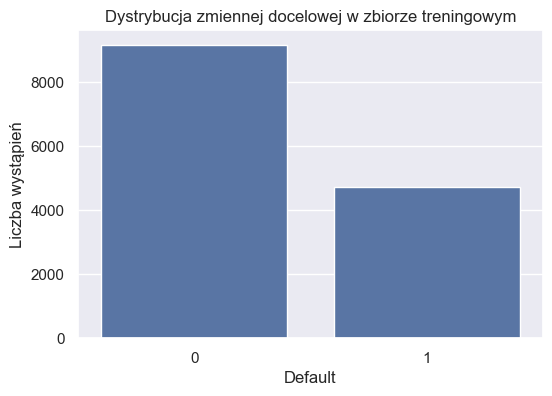

In [81]:
# Wizualizacja dystrybucji
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, legend=False)
plt.title('Dystrybucja zmiennej docelowej w zbiorze treningowym')
plt.xlabel('Default')
plt.ylabel('Liczba wystąpień')
plt.show()

In [39]:
# Inicjalizacja modelu
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [40]:
# Trenowanie modelu na zbiorze treningowym
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [42]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [44]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
def evaluate_model(model, X_val, y_val):
    # Predykcje na zbiorze walidacyjnym
    y_pred = model.predict(X_val)

    # Predykcje prawdopodobieństw (jeśli dostępne)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    else:
        y_pred_proba = y_pred  # W przypadku modeli bez predict_proba

    # Obliczanie metryk
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")

    # Macierz konfuzji
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Macierz konfuzji')
    plt.xlabel('Przewidywane')
    plt.ylabel('Rzeczywiste')
    plt.show()

    # Wykres ROC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('Krzywa ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

=== Regresja logistyczna ===
Accuracy: 0.7192
Precision: 0.6159
Recall: 0.4649
F1-score: 0.5299
AUC-ROC: 0.7654


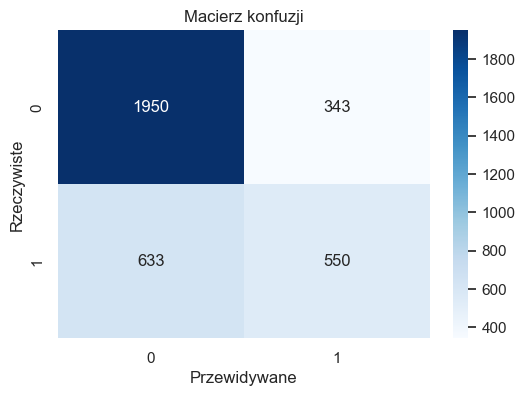

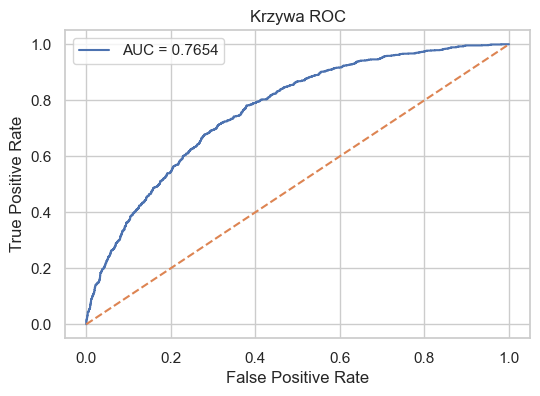

In [46]:
print("=== Regresja logistyczna ===")
evaluate_model(log_reg, X_val, y_val)

=== Drzewo decyzyjne ===
Accuracy: 0.6689
Precision: 0.5135
Recall: 0.5131
F1-score: 0.5133
AUC-ROC: 0.6312


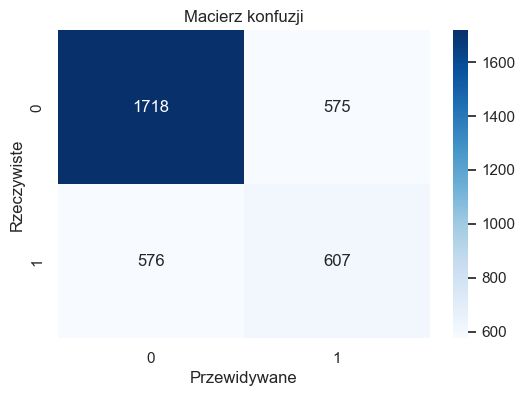

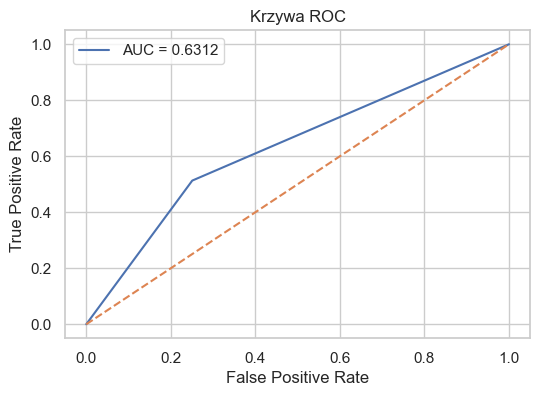

In [47]:
print("=== Drzewo decyzyjne ===")
evaluate_model(dt_classifier, X_val, y_val)

=== Random Forest ===
Accuracy: 0.7411
Precision: 0.6469
Recall: 0.5266
F1-score: 0.5806
AUC-ROC: 0.8038


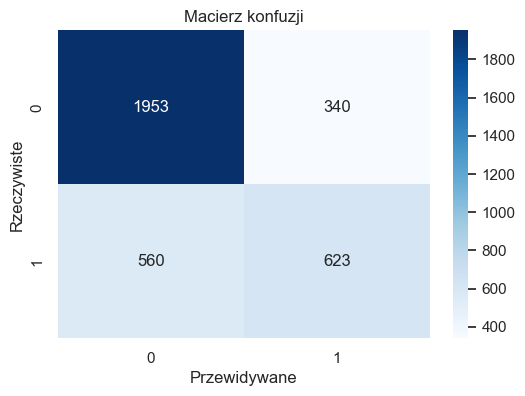

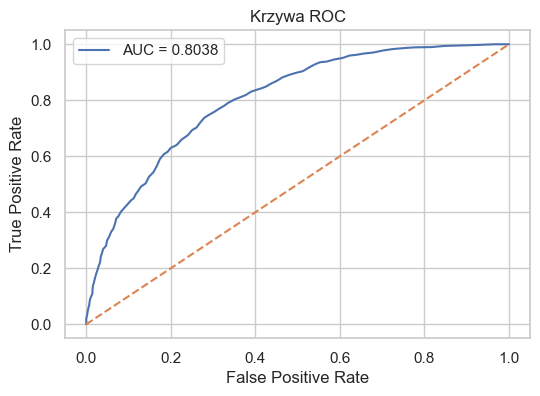

In [48]:
print("=== Random Forest ===")
evaluate_model(rf_classifier, X_val, y_val)

In [49]:
# Ważność cech
importances = rf_classifier.feature_importances_
features = X_train.columns

In [50]:
# Tworzenie ramki danych z ważnościami
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

In [51]:
# Sortowanie cech według ważności
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

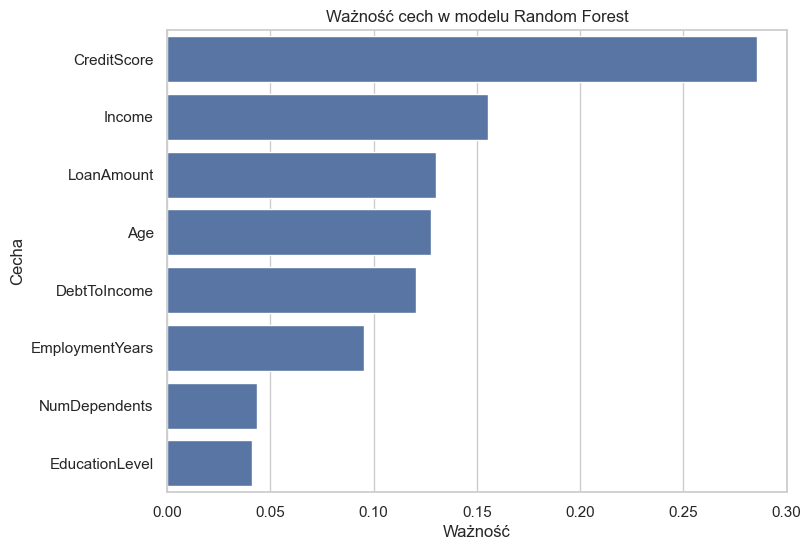

In [52]:
# Wykres słupkowy ważności cech
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, legend=False)
plt.title('Ważność cech w modelu Random Forest')
plt.xlabel('Ważność')
plt.ylabel('Cecha')
plt.show()

<h3>Implementacja GridSearchCV <h3>

In [53]:
# Zakresy wartości hiperparametrów do przeszukania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [54]:
# Inicjalizacja modelu Random Forest
rf = RandomForestClassifier(random_state=42)

In [55]:
# Ustawienie Grid Search z 5-krotną walidacją krzyżową
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

In [56]:
# Dopasowanie modelu Grid Search do danych treningowych
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [57]:
print("Najlepsze hiperparametry:")
print(grid_search.best_params_)

print("\nNajlepszy wynik AUC-ROC:")
print(grid_search.best_score_)

Najlepsze hiperparametry:
{'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Najlepszy wynik AUC-ROC:
0.8175003602180709


In [58]:
# Najlepszy model
best_rf = grid_search.best_estimator_

In [59]:
# Funkcja do oceny modelu (jak wcześniej)
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")

In [60]:
# Ocena najlepszego modelu
print("\n=== Najlepszy model Random Forest po tuningu ===")
evaluate_model(best_rf, X_val, y_val)


=== Najlepszy model Random Forest po tuningu ===
Accuracy: 0.7555
Precision: 0.7265
Recall: 0.4514
F1-score: 0.5568
AUC-ROC: 0.8184


<h3>Implementacja RandomizedSearchCV <h3>

In [62]:
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [63]:
# Inicjalizacja modelu Random Forest
rf = RandomForestClassifier(random_state=42)

In [64]:
# Ustawienie Random Search z 5-krotną walidacją krzyżową
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [65]:
# Dopasowanie modelu Random Search do danych treningowych
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25)],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, scoring='roc_auc', verbose=2)

In [68]:
# Najlepszy model
best_rf_random = random_search.best_estimator_

# Ocena najlepszego modelu
print("\n=== Najlepszy model Random Forest po Randomized Search ===")
evaluate_model(best_rf_random, X_val, y_val)


=== Najlepszy model Random Forest po Randomized Search ===
Accuracy: 0.7509
Precision: 0.7261
Recall: 0.4303
F1-score: 0.5403
AUC-ROC: 0.8194


<h1> Ewaluacja Modelu <h1>

In [69]:
# Jeśli 'Default' w zbiorze testowym jest pusta, ale obecna
if test_scaled['Default'].isnull().all():
    y_test = test_scaled['Default']  # Zakładamy, że mamy prawdziwe wartości
    X_test = test_scaled.drop('Default', axis=1)
else:
    # Jeśli 'Default' nie jest pusta
    y_test = test_scaled['Default']
    X_test = test_scaled.drop('Default', axis=1)

In [70]:
# Przewidywane klasy
y_pred = best_rf.predict(X_test)

In [71]:
# Przewidywane prawdopodobieństwa
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [72]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)

In [73]:
print("=== Wydajność modelu na zbiorze testowym ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

=== Wydajność modelu na zbiorze testowym ===
Accuracy: 0.7342
Precision: 0.6674
Recall: 0.4881
F1-score: 0.5638
AUC-ROC: 0.7955


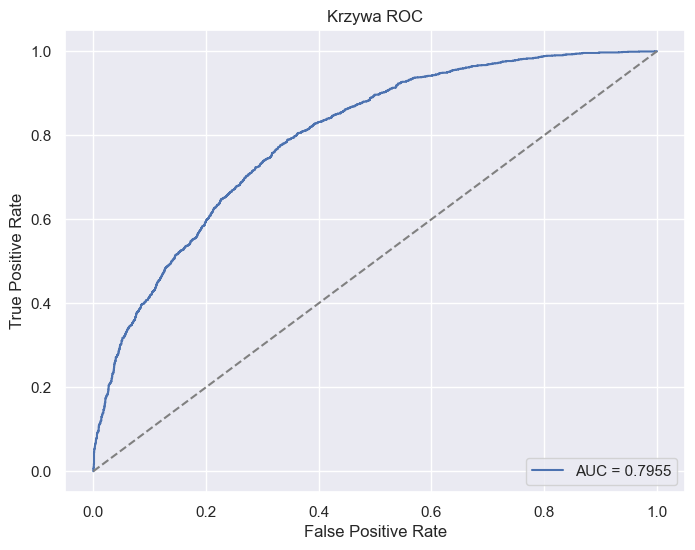

In [74]:
# Obliczenie krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Wizualizacja
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Krzywa ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

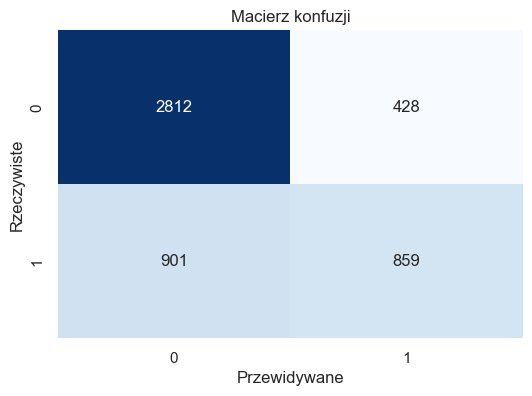

In [75]:
# Obliczenie macierzy konfuzji
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz konfuzji')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

In [76]:
# Ważność cech
importances = best_rf.feature_importances_
features = X_test.columns

# Tworzenie ramki danych z ważnościami
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sortowanie cech według ważności
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

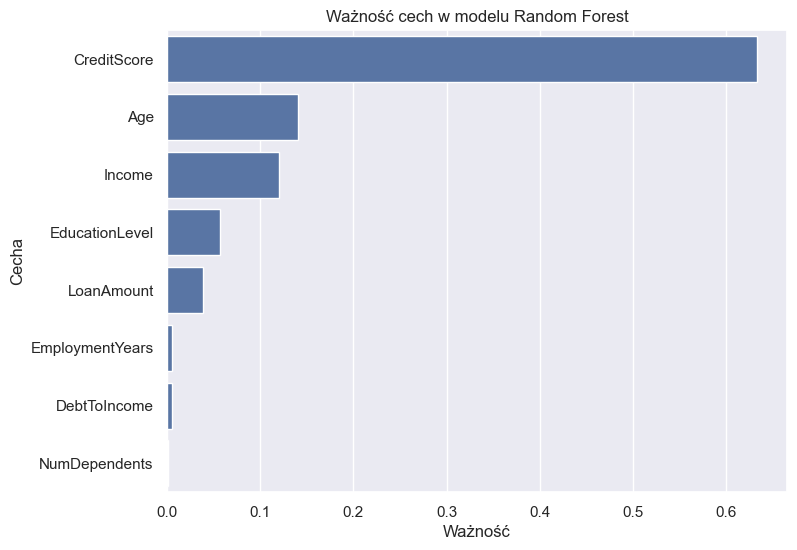

In [80]:
# Wykres słupkowy ważności cech
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, legend=False)
plt.title('Ważność cech w modelu Random Forest')
plt.xlabel('Ważność')
plt.ylabel('Cecha')
plt.show()